### Librerías e importar data


In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
import csv
url = 'https://github.com/OmarElCorralero/Machine-Learning-UV/blob/main/Datas./Housing.csv?raw=true'
df = pd.read_csv(url)
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


## Limpieza de datos

### Valores pérdidos

In [ ]:
total = df.isnull().sum()
percent = (df.isnull().sum() / df.isnull().count())
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
CRIM,0,0.000000
ZN,0,0.000000
INDUS,3,0.005894
CHAS,0,0.000000
NOX,2,0.003929
RM,0,0.000000
AGE,1,0.001965
DIS,0,0.000000
RAD,1,0.001965
TAX,0,0.000000


In [ ]:
total.sum()
percent.sum()

0.015717092337917484

In [ ]:
# Tratamiento de datos faltantes por variable.
df = df[df['INDUS'].notnull()]
df = df[df['NOX'].notnull()]
df = df[df['AGE'].notnull()]
df = df[df['RAD'].notnull()]
df = df[df['LSTAT'].notnull()]

In [ ]:
#Comprobación de que no queden datos faltantes.
total = df.isnull().sum()
percent = (df.isnull().sum() / df.isnull().count())
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


# Análisis exploratorio de los datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     501 non-null    float64
 1   ZN       501 non-null    float64
 2   INDUS    501 non-null    float64
 3   CHAS     501 non-null    int64  
 4   NOX      501 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      501 non-null    float64
 7   DIS      501 non-null    float64
 8   RAD      501 non-null    float64
 9   TAX      501 non-null    int64  
 10  PTRATIO  501 non-null    float64
 11  B        501 non-null    float64
 12  LSTAT    501 non-null    float64
 13  MEDV     501 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 58.7 KB


###Análisis univariable

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.000000
mean,3.763229,11.167665,11.226367,0.069860,0.556261,6.283699,69.066267,3.775799,9.686627,410.670659,18.466068,356.278882,12.73002,22.500200
std,8.790327,23.044345,6.879182,0.255166,0.115768,0.706672,27.907885,2.109610,8.770610,169.507467,2.172438,92.195322,7.16525,9.235463
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.73000,5.000000
25%,0.082440,0.000000,5.190000,0.000000,0.453000,5.884000,45.800000,2.088200,4.000000,280.000000,17.400000,375.330000,7.12000,16.800000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.209000,77.800000,3.132300,5.000000,330.000000,19.100000,391.450000,11.45000,21.200000
75%,3.774980,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,17.10000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,50.000000


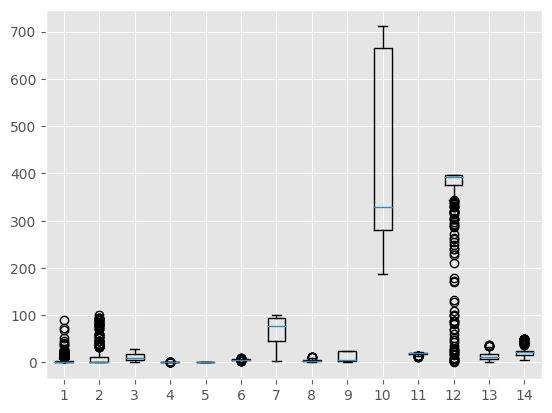

In [ ]:
# Plot todas las variables
plt.boxplot(df)
plt.xlabel('')
plt.ylabel('')
plt.title('')
# show plot
plt.show()

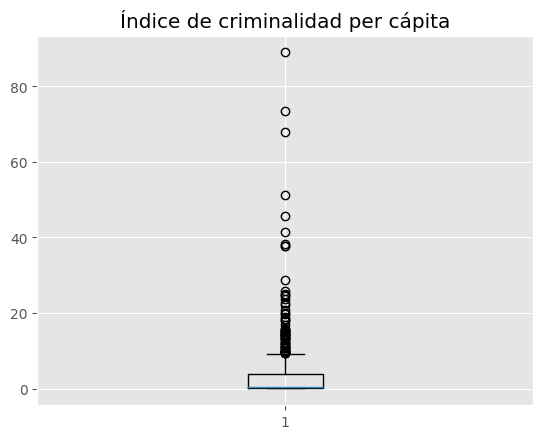

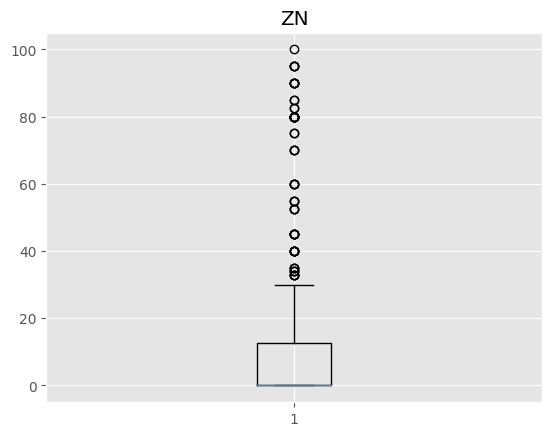

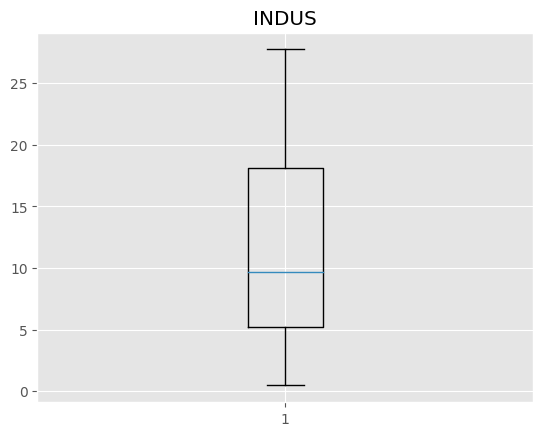

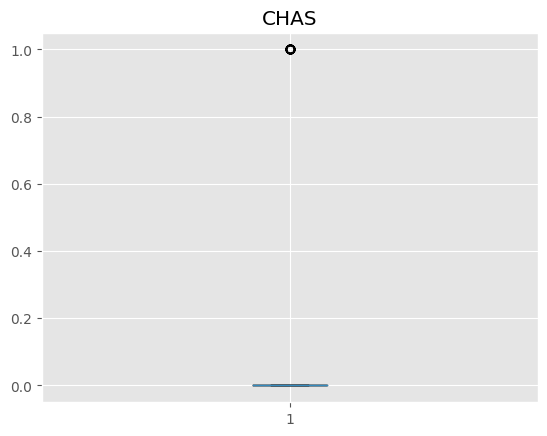

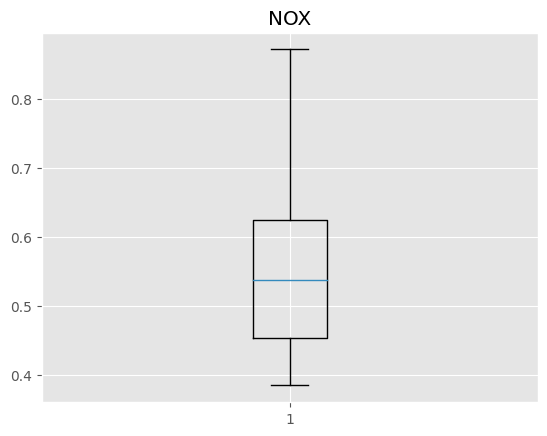

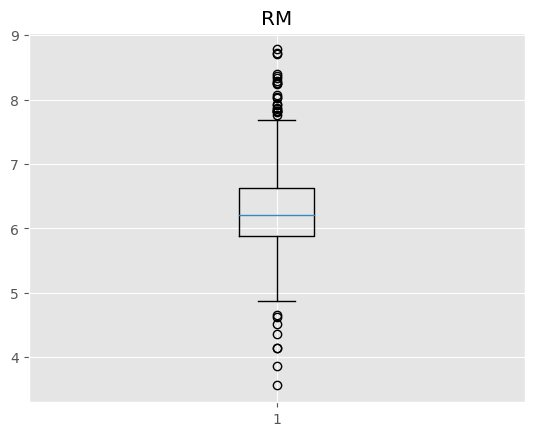

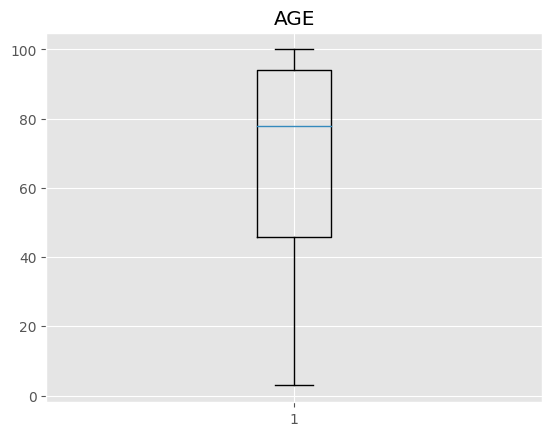

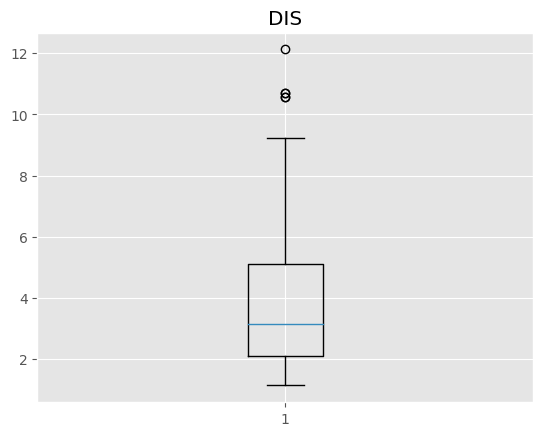

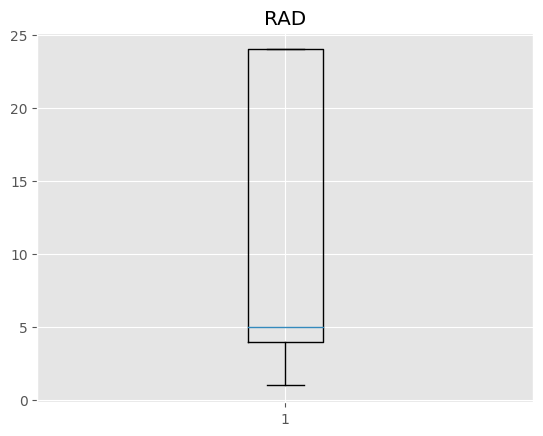

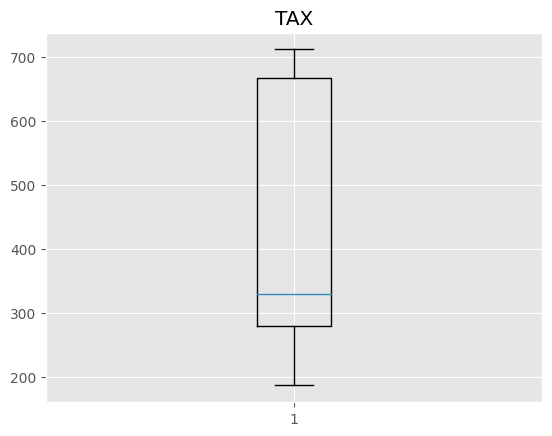

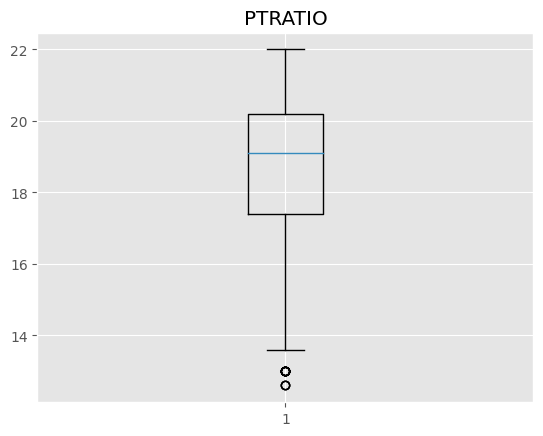

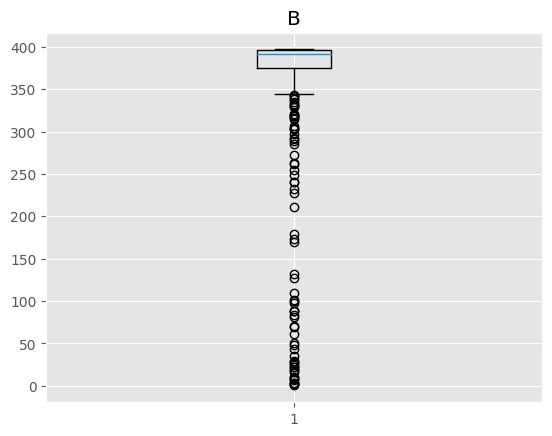

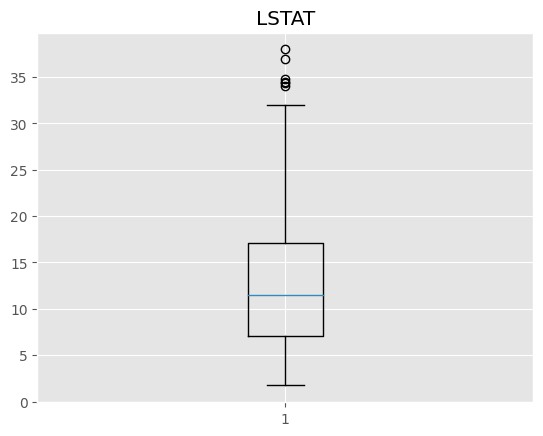

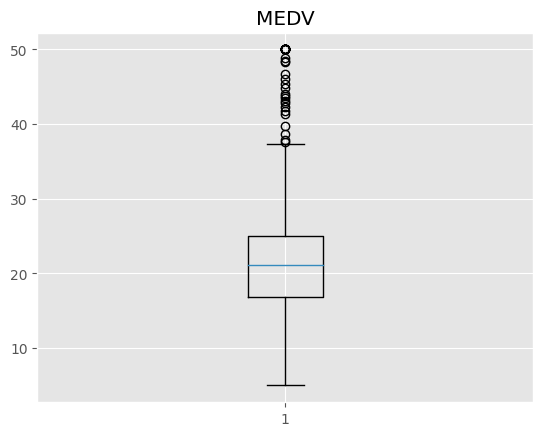

In [ ]:
#boxplot por variable
plt.boxplot(df.CRIM)
plt.title("Índice de criminalidad per cápita")
plt.show()

plt.boxplot(df.ZN)
plt.title("ZN")
plt.show()

plt.boxplot(df.INDUS)
plt.title("INDUS")
plt.show()

plt.boxplot(df.CHAS)
plt.title("CHAS")
plt.show()

plt.boxplot(df.NOX)
plt.title("NOX")
plt.show()

plt.boxplot(df.RM)
plt.title("RM")
plt.show()

plt.boxplot(df.AGE)
plt.title("AGE")
plt.show()

plt.boxplot(df.DIS)
plt.title("DIS")
plt.show()

plt.boxplot(df.RAD)
plt.title("RAD")
plt.show()

plt.boxplot(df.TAX)
plt.title("TAX")
plt.show()

plt.boxplot(df.PTRATIO)
plt.title("PTRATIO")
plt.show()

plt.boxplot(df.B)
plt.title("B")
plt.show()

plt.boxplot(df.LSTAT)
plt.title("LSTAT")
plt.show()

plt.boxplot(df.MEDV)
plt.title("MEDV")
plt.show()

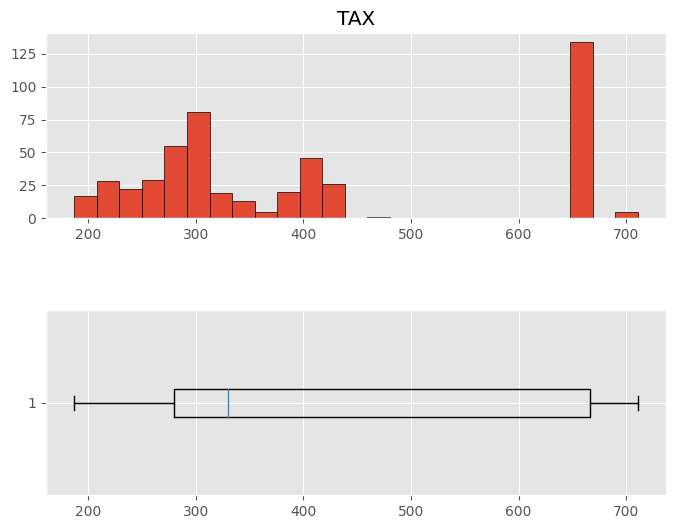

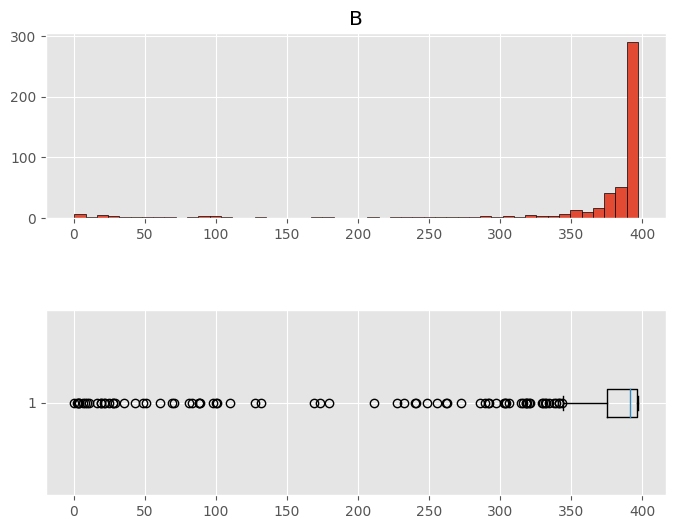

In [ ]:

#TAX
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.hist(df.TAX, bins=25, edgecolor='black')
ax1.set_title('TAX')
ax2.boxplot(df.TAX, vert=False)
plt.subplots_adjust(hspace=0.5)
plt.show()

#B
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.hist(df.B, bins=50, edgecolor='black')
ax1.set_title('B')
ax2.boxplot(df.B, vert=False)
plt.subplots_adjust(hspace=0.5)
plt.show()

Text(0, 0.5, '-B')

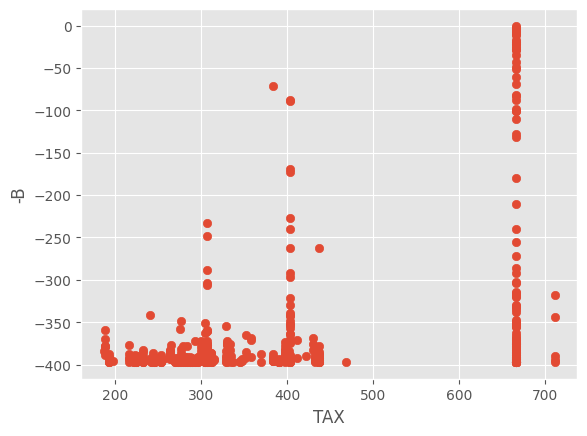

In [ ]:
plt.scatter(df.TAX, -df.B)
plt.xlabel('TAX')
plt.ylabel('-B')

### Análisis multivariable

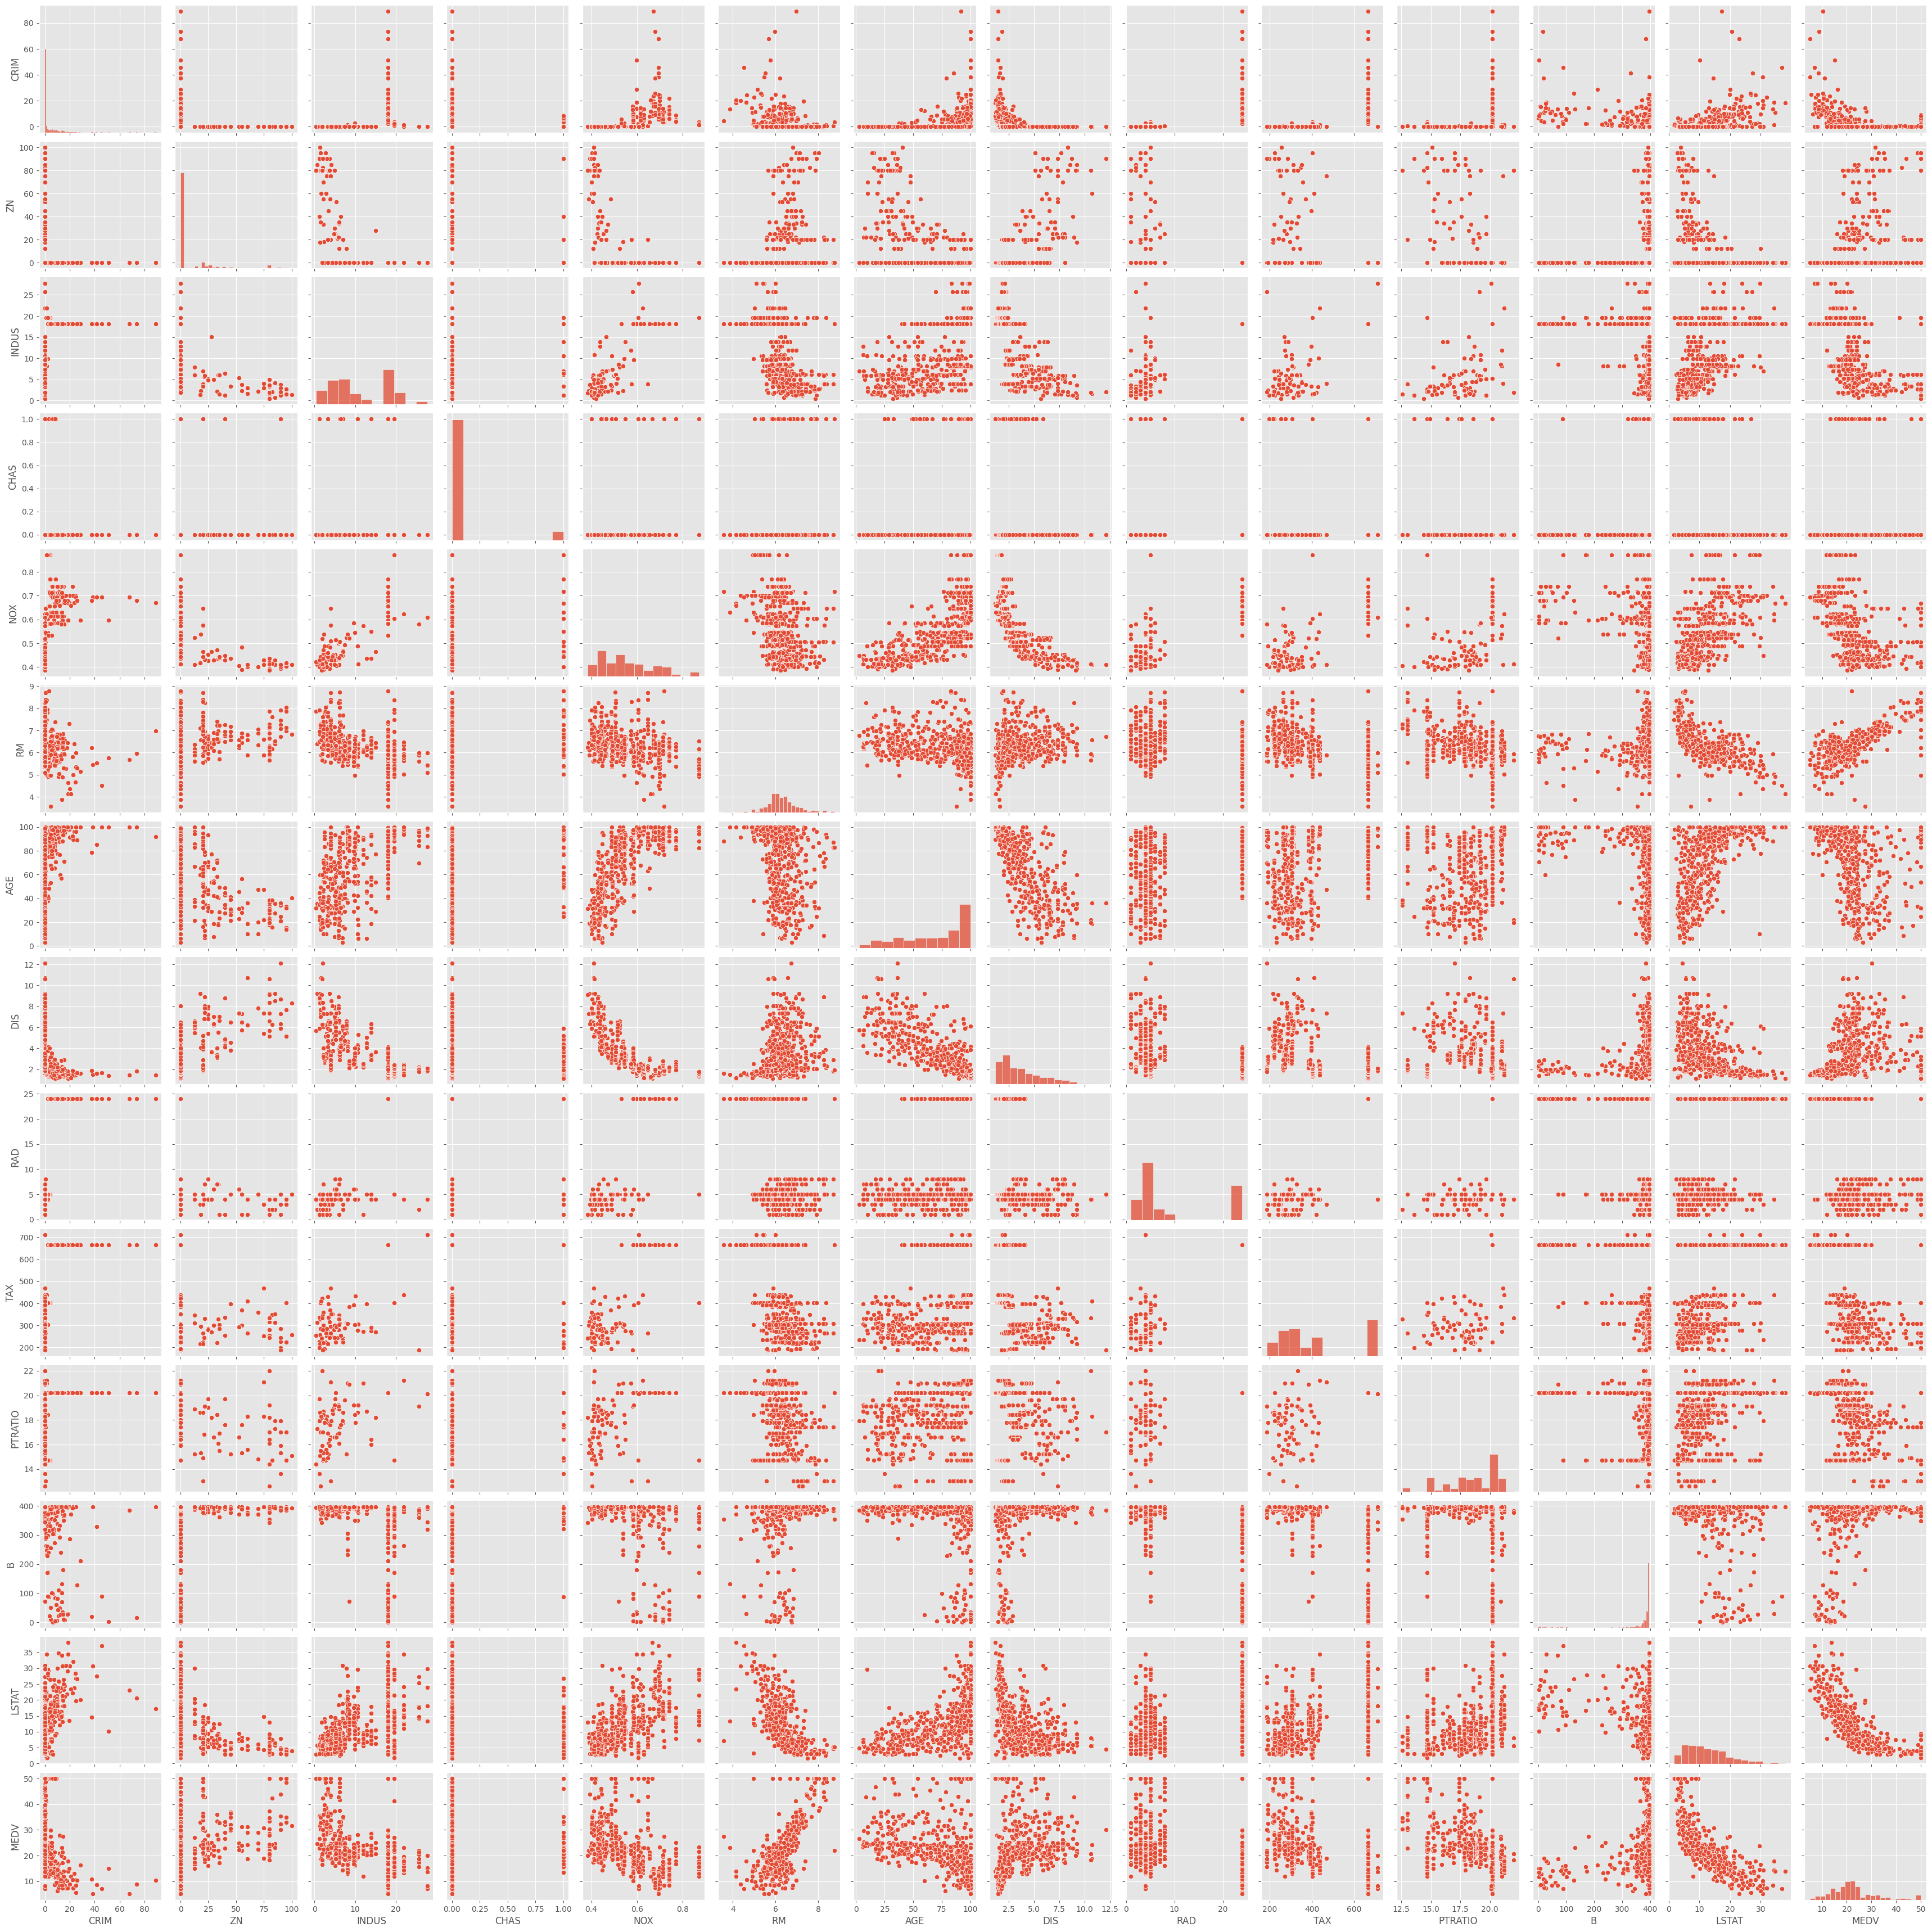

In [ ]:
#df.corr()
sns.pairplot(df)

<Axes: >

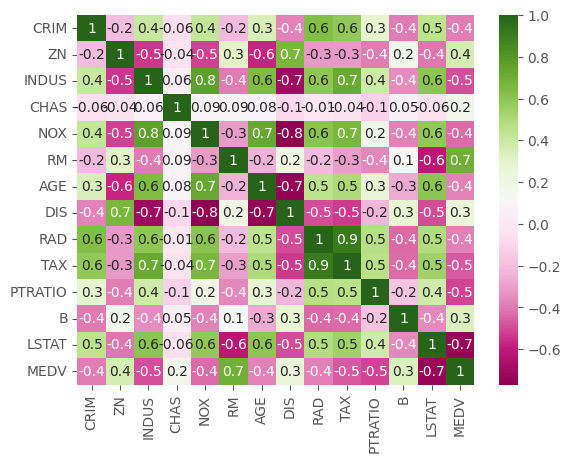

In [ ]:
sns.heatmap(df.corr(),  annot=True, cmap="PiYG", fmt='.0g')

# Reducción de dimensión


### PCA

In [ ]:
# importando para trabajar con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 14)
pca.fit(df)

PCA(n_components=14)

Text(0, 0.5, 'Proporción de la varianza explicada')

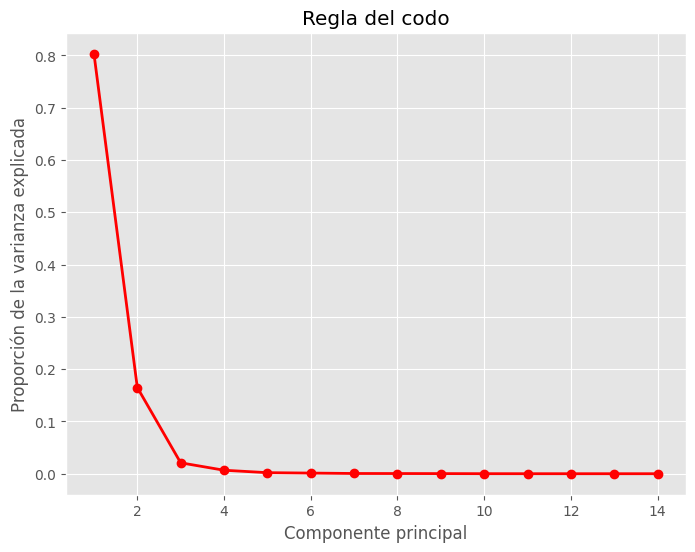

In [ ]:
#trazamos un gráfico para visualizar la proporción de varianza explicada por cada
#componente principal calculado en el paso anterior.

PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize = (8,6))
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.title('Regla del codo')
plt.xlabel('Componente principal')
plt.ylabel('Proporción de la varianza explicada')

A través de esta regla, podemos utilizar dos componenetes principales

In [ ]:
#ajustamos pca a 2 componentes principales
#vizualizamos los autovalores y porcentaje de la varianza para ver que tanto explican nuestras componentes

pca = PCA(n_components = 2)
pca.fit(df)

print('Autovalores:')
print(pca.explained_variance_)

print('Porcentaje de varianza:')
print(pca.explained_variance_ratio_ * 100)

Autovalores:
[31237.2073364   6412.09843668]
Porcentaje de varianza:
[80.32081756 16.48754907]


In [ ]:
total=80.32081756 +16.48754907
print(total)

96.80836663


Notamos que estas dos componentes explican casi el 97% de nuestros datos.

In [ ]:
#transformamos los datos originales utilizando las componentes principales calculados
#mediante PCA y crea un nuevo dataframe df_pca que contiene las dos primeras componentes principales
#como columnas etiquetadas como 'PC1' y 'PC2'


pc = pca.transform(df)
df_pca = pd.DataFrame(
    pc,
    columns = ['PC1', 'PC2'])

df_pca.head()

,PC1,PC2
0,-122.315598,-5.283970
1,-171.362853,10.384879
2,-172.086443,14.228472
3,-192.940144,18.445701
4,-192.930380,16.219586


In [ ]:
#creamos un nuevo dataframe llamado df_pca_comp que contiene las componentes principales
#calculados por PCA como columnas etiquetadas con los nombres de las características originales del conjunto de datos


df_pca_comp =pd.DataFrame(
    pca.components_,
    columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

df_pca_comp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.030107,-0.043208,0.028261,-0.000061,0.000445,-0.001200,0.081627,-0.006521,0.045116,0.949784,0.005659,-0.290499,0.022750,-0.025632
1,0.008610,0.001798,-0.004960,-0.000098,0.000004,0.000401,-0.005160,0.000369,-0.008734,-0.292002,-0.002538,-0.956254,0.005048,-0.008757


<Axes: >

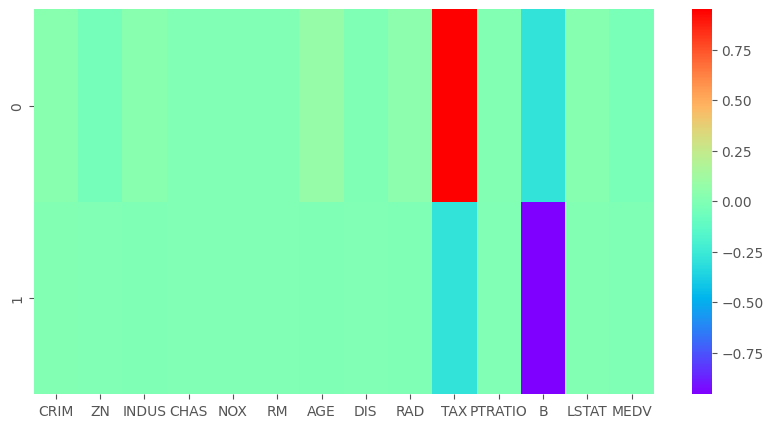

In [ ]:
#creamos un mapa de calor que muestra los valores de los componentes principales en relación
#con las características originales del conjunto de datos

plt.figure(figsize = (10,5))
sns.heatmap(
    df_pca_comp,
    cmap = 'rainbow')

acá se puede apreciar que las variables más explicativas son TAX y B


In [ ]:
#calculamos los "loadings" de nuestras variables contra las componentes

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'])
print(loadings)

         PC1       PC2
0   0.030107  0.008610
1  -0.043208  0.001798
2   0.028261 -0.004960
3  -0.000061 -0.000098
4   0.000445  0.000004
5  -0.001200  0.000401
6   0.081627 -0.005160
7  -0.006521  0.000369
8   0.045116 -0.008734
9   0.949784 -0.292002
10  0.005659 -0.002538
11 -0.290499 -0.956254
12  0.022750  0.005048
13 -0.025632 -0.008757


In [ ]:
#realizamos un agrupamiento jerárquico en el conjunto de datos df_pca y creamos
#dos clústeres basados en la similitud de las muestras utilizando la distancia
#euclidiana y el método 'ward' para calcular las distancias entre los clústeres.

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<Axes: xlabel='PC1', ylabel='PC2'>

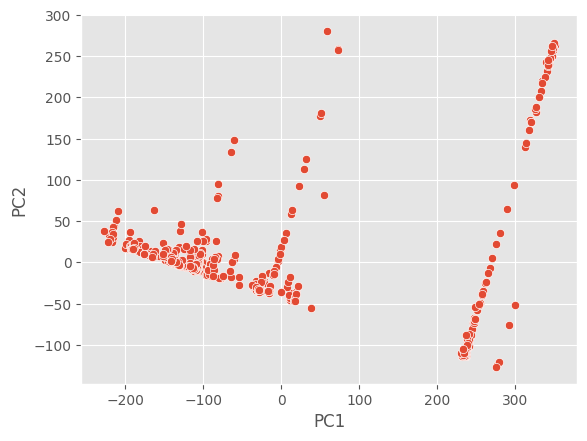

In [ ]:
#generamos un gráfico de dispersión bidimensional en el que cada muestra se ubicará según sus valores
#en PC1 (eje X) y PC2 (eje Y), y coloreamos según el clúster al que pertenezcan
#lo que permitirá visualizar la distribución y agrupación de los datos en el espacio
#de las dos primeras componentes principales después del agrupamiento jerárquico.

sns.scatterplot(x = df_pca['PC1'], y = df_pca['PC2'],
                data = df)

# Modelos

K-Means

In [ ]:
from sklearn.cluster import KMeans

#agrupamos las muestras en df_pca en dos clústeres y luego imprimimos las coordenadas de los centroides de esos clústeres
#estos centroides son puntos importantes que representan la posición central de cada clúster en el espacio de las dos primeras componentes principales (PC1 y PC2).



kmeans = KMeans(n_clusters=2).fit(df_pca)
centroids = kmeans.cluster_centers_
print(centroids)

[[-102.28697502    5.13173322]
 [ 266.38766156  -13.36465773]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels = kmeans.predict(df_pca)
df['label'] = labels

Después de ajustar el modelo K-Means a df_pca, se utilizó el mismo modelo para predecir las etiquetas de clústeres para las muestras en el DataFrame original df. Las etiquetas predichas se agregaron como una nueva columna 'label' al DataFrame df, lo que permite identificar a qué clúster pertenece cada muestra en función de su posición en las dos primeras componentes principales (PC1 y PC2).

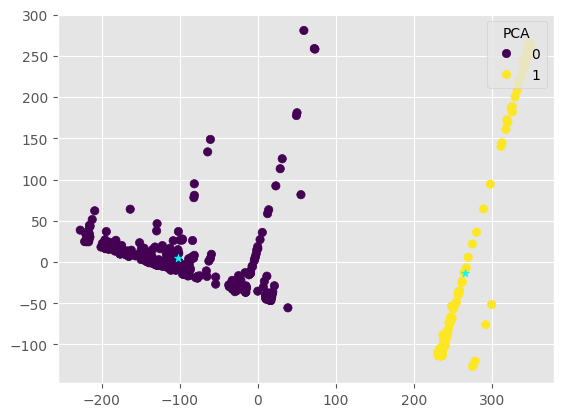

In [ ]:
scatter=plt.scatter(x = df_pca['PC1'], y = df_pca['PC2'], c=labels)
plt.legend(*scatter.legend_elements(num='auto'),
                    loc="upper right", title="PCA")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='cyan')
plt.show()

 Cada muestra está coloreada según su etiqueta de clúster obtenida mediante K-Means.

### Jerarquico

In [ ]:
X =  df_pca

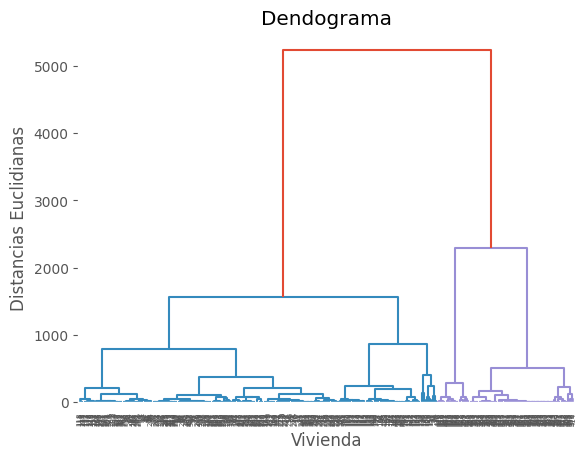

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Vivienda')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [ ]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2,
                    affinity = 'euclidean',
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


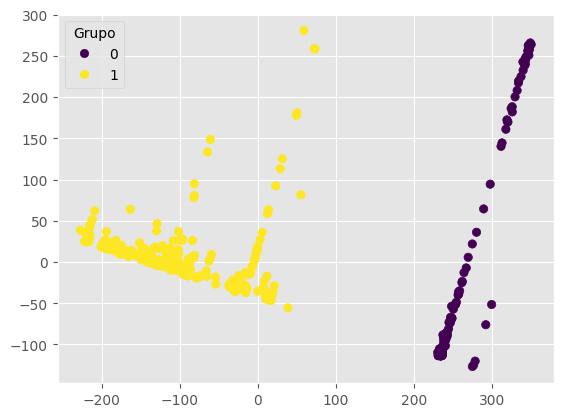

In [ ]:
plt.scatter(x = df_pca['PC1'], y = df_pca['PC2'], c=y_hc)
plt.legend(*scatter.legend_elements(num='auto'),
                    loc="upper left", title="Grupo")
plt.show()